In [48]:
# only Sheet that is  Updating for Nepali Cars sheet
# updated and splitted title column to brandname, year and model
import pandas as pd



In [49]:
columns_to_use = ['PRICE_NEW', 'KM_INT','GEARBOX', 'FUEL','DRIVE', 'AGE','Ford','Hyundai','Kia','Mahindra','Maruti Suzuki','Nissan','Tata','Toyota','Volkswagen','Renualt','Blue','Brown','Gray','Maroon','Red','Silver','White','Hatchback','Pickup','SUV','Sedan','0-1000(cc)','1001-1500(cc)','1501-2000(cc)','2001-2500(cc)','2501-2900(cc)']

df = pd.read_csv('Final-with-full-dummies_with_value_0and_1.csv');
pd.set_option('display.max_rows', None)


In [50]:
summary_stats=df.describe()
    
print(summary_stats)

        Unnamed: 0     PRICE_NEW         KM_INT         FUEL      GEARBOX  \
count  2045.000000  2.045000e+03    2045.000000  2045.000000  2045.000000   
mean   1659.503178  2.411397e+06   57680.316870     0.760391     0.784841   
std     913.119150  2.298834e+06   39056.470586     0.426949     0.411033   
min       0.000000  2.200000e+05     300.000000     0.000000     0.000000   
25%     955.000000  1.280000e+06   37600.000000     1.000000     1.000000   
50%    1656.000000  1.950000e+06   52000.000000     1.000000     1.000000   
75%    2437.000000  2.700000e+06   69240.000000     1.000000     1.000000   
max    3203.000000  4.250000e+07  485780.000000     1.000000     1.000000   

             DRIVE          AGE         Ford      Hyundai          Kia  \
count  2045.000000  2045.000000  2045.000000  2045.000000  2045.000000   
mean      0.223472     9.207824     0.084108     0.279707     0.059658   
std       0.416674     5.865113     0.277617     0.448965     0.236909   
min       

In [51]:
# variable_info=df.info()

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

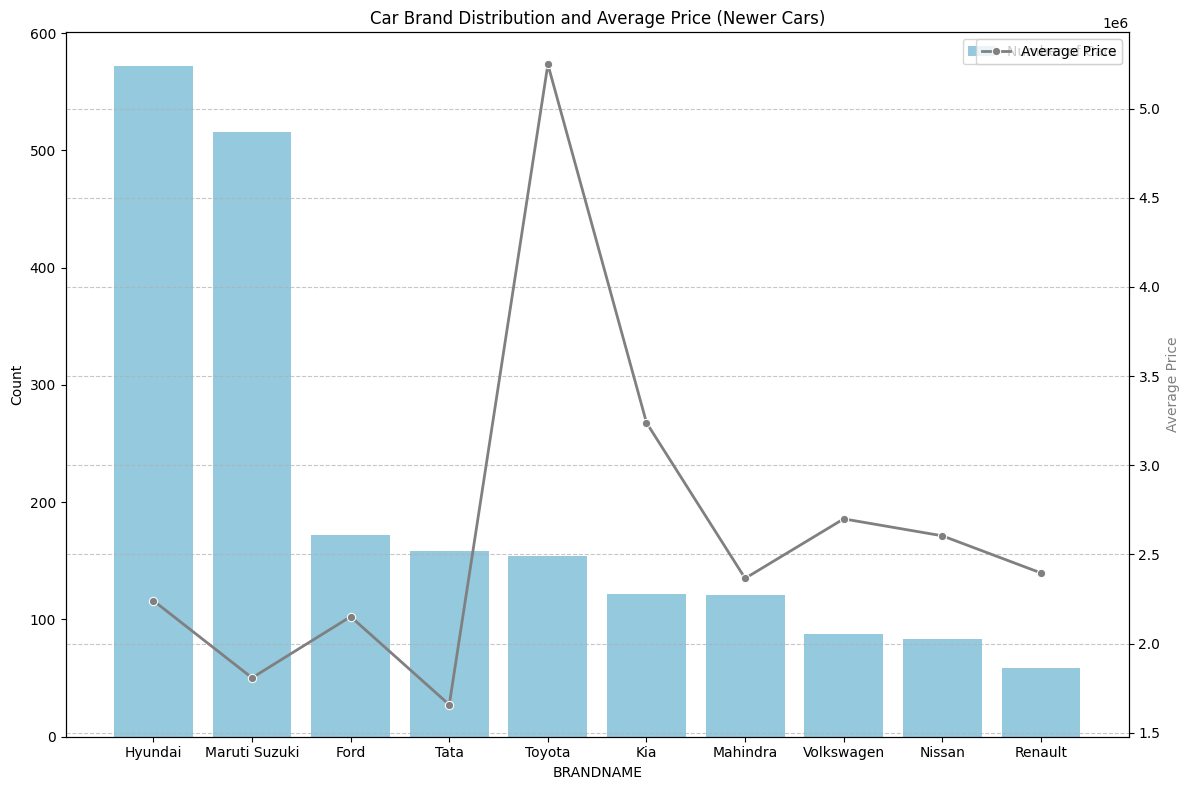

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
columns = ["PRICE_NEW","BRANDNAME", "FUEL", "GEARBOX", "BODY", "DRIVE", "ENGINERANGE"]

df = pd.read_csv('Raw Data Final.csv',usecols=columns);

brand_counts = df['BRANDNAME'].value_counts().reset_index()
brand_counts.columns = ['BRANDNAME', 'COUNT']

# Sort brand names by the number of cars in descending order
brand_counts_sorted = brand_counts.sort_values(by='COUNT', ascending=False)

# Calculate average pricing by brand
average_price_by_brand = df.groupby('BRANDNAME')['PRICE_NEW'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Bar graph - Number of cars by brand (sorted)
sns.barplot(x='BRANDNAME', y='COUNT', data=brand_counts_sorted, color='skyblue', label='Number of Cars')
# plt.title('Number of Cars by Brand with Average Price')
plt.ylabel('Count')

# Adding secondary y-axis for the line chart
ax2 = plt.twinx()
sns.lineplot(x='BRANDNAME', y='PRICE_NEW', data=average_price_by_brand, color='gray', marker='o', linewidth=2, label='Average Price', ax=ax2)

# Customize the plot
plt.title('Car Brand Distribution and Average Price (Newer Cars)')  # Added informative title
plt.xlabel('Car Brand')
plt.ylabel('Count', color='skyblue')  # Set label color to match bar chart
ax2.set_ylabel('Average Price', color='gray')  # Set label color to match line chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines for readability
plt.legend()  # Include a legend

# Improve layout
plt.tight_layout()
plt.show()

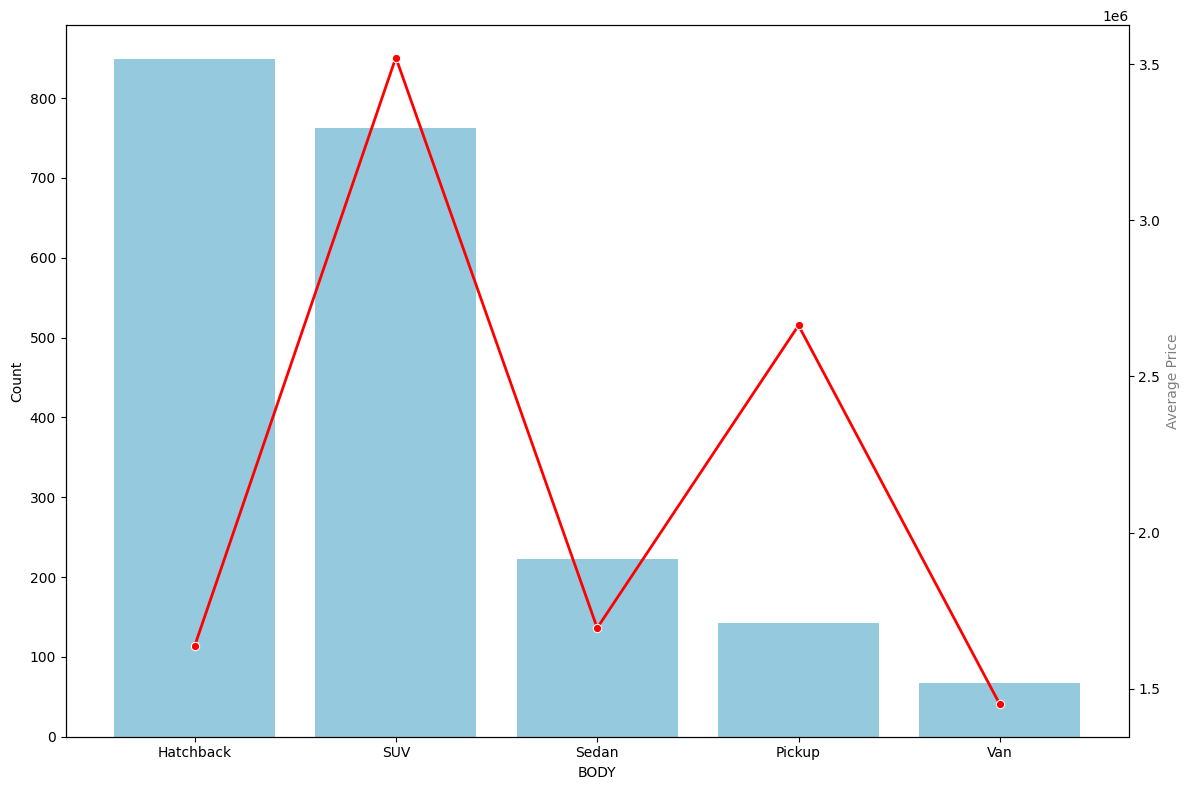

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
columns = ["PRICE_NEW","BRANDNAME", "FUEL", "GEARBOX", "BODY", "DRIVE", "ENGINERANGE"]

df = pd.read_csv('Raw Data Final.csv',usecols=columns);

body_count = df['BODY'].value_counts().reset_index()
body_count.columns = ['BODY', 'COUNT']

# Sort brand names by the number of cars in descending order
body_count_sorted = body_count.sort_values(by='COUNT', ascending=False)

# Calculate average pricing by brand
average_price_by_body = df.groupby('BODY')['PRICE_NEW'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Bar graph - Number of cars by brand (sorted)
sns.barplot(x='BODY', y='COUNT', data=body_count_sorted, color='skyblue')
# plt.title('Number of Cars by Body Type with Average Price')
plt.ylabel('Count')

# Adding secondary y-axis for the line chart
plt.twinx()
sns.lineplot(x='BODY', y='PRICE_NEW', data=average_price_by_body, color='red', marker='o', linewidth=2)
plt.ylabel('Average Price', color='gray')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

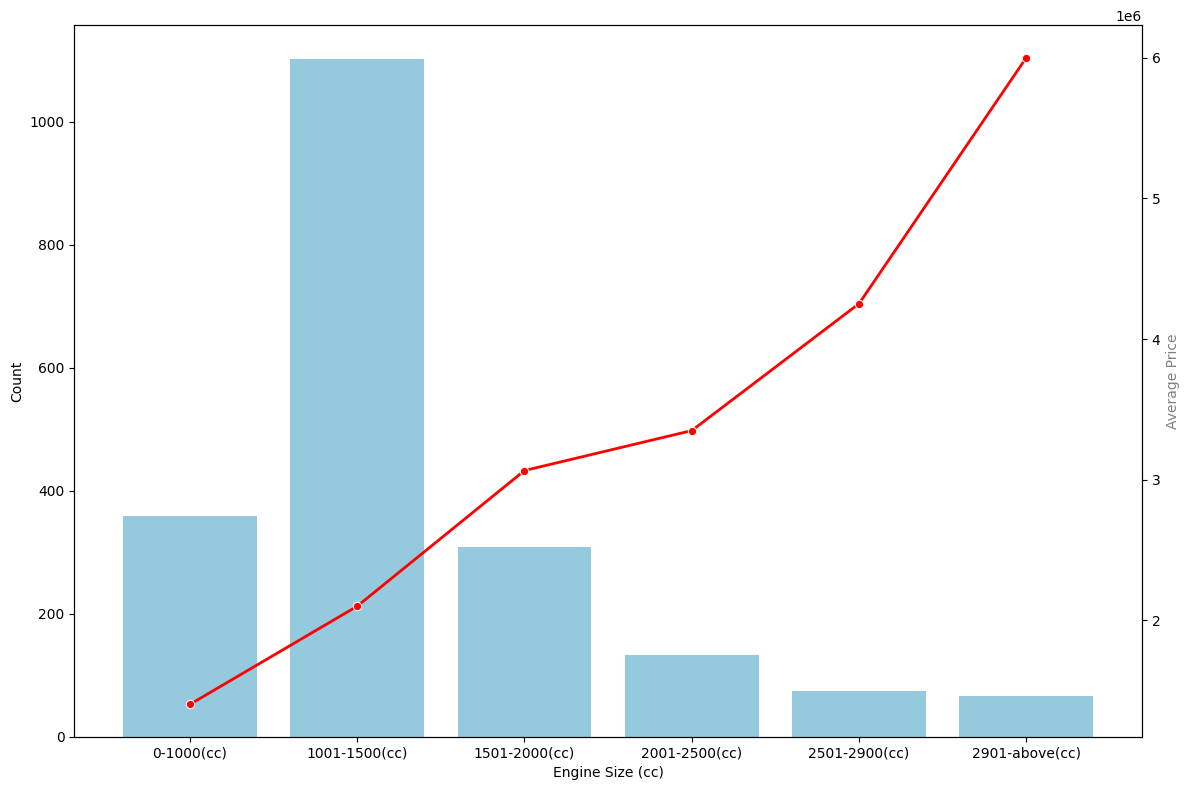

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
columns = ["PRICE_NEW", "BRANDNAME", "FUEL", "GEARBOX", "BODY", "DRIVE", "ENGINERANGE"]
df = pd.read_csv('Raw Data Final.csv', usecols=columns)

# Extract first character from ENGINERANGE column and create a new column for sorting
df['ENGINE_SORT'] = df['ENGINERANGE'].str.extract(r'^(\d+)', expand=False).astype(int)

engine_Range = df['ENGINERANGE'].value_counts().reset_index()
engine_Range.columns = ['ENGINERANGE', 'COUNT']

# Sort engine ranges by the first character in ascending order
engine_Range_sorted = engine_Range.sort_values(by='ENGINERANGE', key=lambda x: x.astype(str).str[0])

# Calculate average pricing by engine range
average_price_by_cc = df.groupby('ENGINERANGE')['PRICE_NEW'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Bar graph - Number of cars by engine range (sorted by first character)
sns.barplot(x='ENGINERANGE', y='COUNT', data=engine_Range_sorted, color='skyblue', order=engine_Range_sorted['ENGINERANGE'])
# plt.title('Number of Cars by Engine Size (cc) with Average Price')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Count')

# Adding secondary y-axis for the line chart
plt.twinx()
sns.lineplot(x='ENGINERANGE', y='PRICE_NEW', data=average_price_by_cc, color='red', marker='o', linewidth=2)
plt.ylabel('Average Price', color='gray')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [56]:
#Calculate % of all verticales in dataset
columns = ["BRANDNAME", "FUEL", "GEARBOX", "BODY", "DRIVE", "ENGINERANGE",'COLOR']

df = pd.read_csv('Raw Data Final.csv',usecols=columns);
percentages = {}

# Total number of observations in the dataset
total_observations = len(df)

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column contains categorical data
    if df[column].dtype == 'object':
        # Count the occurrences of each category
        category_counts = df[column].value_counts()
        # Calculate the percentage for each category
        category_percentages = (category_counts / total_observations) * 100
        # Store the percentages in the dictionary
        percentages[column] = category_percentages

# Print the percentages for each variable
for column, percentage in percentages.items():
    print("Percentage distribution for", column)
    print(percentage)
    print()

Percentage distribution for BRANDNAME
BRANDNAME
Hyundai          27.970660
Maruti Suzuki    25.232274
Ford              8.410758
Tata              7.726161
Toyota            7.530562
Kia               5.965770
Mahindra          5.916870
Volkswagen        4.303178
Nissan            4.058680
Renault           2.885086
Name: count, dtype: float64

Percentage distribution for FUEL
FUEL
Petrol    76.03912
Diesel    23.96088
Name: count, dtype: float64

Percentage distribution for BODY
BODY
Hatchback    41.515892
SUV          37.310513
Sedan        10.904645
Pickup        6.992665
Van           3.276284
Name: count, dtype: float64

Percentage distribution for GEARBOX
GEARBOX
Manual       78.484108
Automatic    21.515892
Name: count, dtype: float64

Percentage distribution for DRIVE
DRIVE
2WD    77.652812
4WD    22.347188
Name: count, dtype: float64

Percentage distribution for COLOR
COLOR
Silver          27.286064
White           19.706601
Gray            16.381418
Other Colors    14.767726


In [57]:
#for correlation using 
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

df = pd.read_csv('Final-with-full-dummies_with_value_0and_1.csv');
# Assuming you have the dataset stored in a DataFrame named 'df'
df.drop(columns=['Unnamed: 0'], inplace=True)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Calculate point-biserial correlation coefficients for discrete variables
discrete_variables = ['FUEL', 'GEARBOX', 'DRIVE', 'Ford', 'Hyundai', 'Kia', 'Mahindra', 'Maruti Suzuki', 'Nissan', 'Tata', 'Toyota', 'Volkswagen','Renault', 'Black', 'Gray', 'Blue', 'Brown', 'Maroon', 'Red', 'Silver','White', 'Other Colors', 'Hatchback', 'Pickup', 'SUV', 'Sedan','Van', '0-1000(cc)','1001-1500(cc)', '1501-2000(cc)', '2001-2500(cc)', '2501-2900(cc)', '2901-above(cc)']
for var in discrete_variables:
    for column in df.columns:
        if df[column].dtype != 'object' and column != var:
            corr, _ = pointbiserialr(df[column], df[var])
            correlation_matrix.at[var, column] = corr

# Print correlation table
print("Correlation Table:")
print(correlation_matrix)
correlation_matrix.corr()

Correlation Table:
                PRICE_NEW    KM_INT      FUEL   GEARBOX     DRIVE       AGE  \
PRICE_NEW        1.000000 -0.131095 -0.218893 -0.167756  0.300035 -0.295722   
KM_INT          -0.131095  1.000000 -0.176387  0.049798  0.167188  0.394016   
FUEL            -0.218893 -0.176387  1.000000  0.060139 -0.411135 -0.005894   
GEARBOX         -0.167756  0.049798  0.060139  1.000000 -0.233304  0.079439   
DRIVE            0.300035  0.167188 -0.411135 -0.233304  1.000000  0.115115   
AGE             -0.295722  0.394016 -0.005894  0.079439  0.115115  1.000000   
Ford            -0.034295 -0.050697  0.066919 -0.004256 -0.052602 -0.095472   
Hyundai         -0.046281 -0.056347  0.209432  0.026699 -0.088463  0.049258   
Kia              0.090681 -0.039549 -0.023061 -0.064061  0.077991  0.042479   
Mahindra        -0.004955  0.098175 -0.393332  0.020347  0.193835 -0.086648   
Maruti Suzuki   -0.152503 -0.006746  0.225875  0.054854 -0.162998 -0.012910   
Nissan           0.017277 -0.0012

,PRICE_NEW,KM_INT,FUEL,GEARBOX,DRIVE,AGE,Ford,Hyundai,Kia,Mahindra,Maruti Suzuki,Nissan,Renault,Tata,Toyota,Volkswagen,Black,Blue,Brown,Gray,Maroon,Other Colors,Red,Silver,White,Hatchback,Pickup,SUV,Sedan,Van,0-1000(cc),1001-1500(cc),1501-2000(cc),2001-2500(cc),2501-2900(cc),2901-above(cc)
PRICE_NEW,1.000000,-0.129985,-0.513218,-0.439940,0.629375,-0.392853,-0.021302,-0.167950,0.220421,0.217799,-0.413388,0.082194,0.054646,-0.018049,0.573435,0.006430,0.098584,-0.146943,0.137180,-0.186963,0.271159,0.005125,-0.112003,-0.027353,0.159452,-0.622126,0.241890,0.696186,-0.204976,-0.164508,-0.411395,-0.320733,0.297437,0.340460,0.346985,0.520435
KM_INT,-0.129985,1.000000,-0.341768,0.050335,0.315820,0.615316,-0.162375,-0.170741,-0.079220,0.252490,-0.025491,0.015287,-0.157930,0.077335,0.358735,-0.076337,0.119422,-0.012421,0.032701,-0.119557,0.043056,0.033581,-0.070553,-0.163378,0.241762,-0.095530,0.255303,-0.058207,0.052113,0.037737,0.142671,-0.401030,-0.004947,0.253918,0.292689,0.324528
FUEL,-0.513218,-0.341768,1.000000,0.285827,-0.788177,0.064645,0.119609,0.421924,-0.107618,-0.707568,0.466345,-0.124640,-0.034241,-0.434228,-0.464628,0.117657,-0.172847,0.081447,-0.287506,0.398758,-0.360641,-0.071877,0.109408,0.160955,-0.293019,0.735084,-0.755782,-0.543803,0.224386,0.043816,0.258778,0.617800,-0.190723,-0.683902,-0.637701,-0.560495
GEARBOX,-0.439940,0.050335,0.285827,1.000000,-0.488123,0.176807,-0.013060,0.135694,-0.195648,-0.089284,0.223239,-0.040333,-0.160561,-0.079758,-0.182448,-0.002739,-0.108522,0.062988,-0.165822,0.161055,-0.187932,-0.221592,0.030380,0.177256,-0.043627,0.418430,-0.123766,-0.486446,0.180628,0.025753,0.168289,0.165725,-0.117344,-0.196213,-0.120057,-0.278781
DRIVE,0.629375,0.315820,-0.788177,-0.488123,1.000000,0.048737,-0.112858,-0.279754,0.203217,0.523401,-0.453330,0.148884,-0.012356,0.106066,0.562611,-0.056580,0.228370,-0.114474,0.258091,-0.347896,0.252029,0.183044,-0.097754,-0.150425,0.185381,-0.727776,0.518480,0.679769,-0.226129,-0.145381,-0.327709,-0.580188,0.311178,0.665788,0.508872,0.508521
AGE,-0.392853,0.615316,0.064645,0.176807,0.048737,1.000000,-0.192012,0.117221,0.025180,-0.140280,0.027172,0.037200,-0.276394,-0.153187,0.248385,0.087395,0.117853,0.095967,-0.120454,0.059392,-0.011142,0.098626,0.072051,-0.065427,-0.149700,0.196899,-0.111545,-0.288270,0.299926,-0.070077,0.034409,-0.072186,0.091841,-0.036605,-0.042550,0.066832
Ford,-0.021302,-0.162375,0.119609,-0.013060,-0.112858,-0.192012,1.000000,-0.124958,-0.066546,-0.100581,-0.148684,-0.073559,-0.029997,-0.073381,-0.109354,-0.087684,-0.023524,0.019941,-0.023816,0.035567,-0.086004,-0.041059,-0.029419,-0.039508,0.100149,-0.015637,-0.090439,0.106595,-0.047538,-0.083130,-0.232834,0.356144,-0.173008,-0.107664,-0.100956,-0.010733
Hyundai,-0.167950,-0.170741,0.421924,0.135694,-0.279754,0.117221,-0.124958,1.000000,-0.132462,-0.312996,-0.270873,-0.143926,-0.130116,-0.277382,-0.266483,-0.052994,-0.084177,-0.001104,-0.158702,0.155457,-0.085743,0.005956,0.095619,0.190724,-0.294229,0.391290,-0.400182,-0.173769,0.018001,-0.230197,-0.217365,0.403714,0.100442,-0.309147,-0.300287,-0.272770
Kia,0.220421,-0.079220,-0.107618,-0.195648,0.203217,0.025180,-0.066546,-0.132462,1.000000,-0.035991,-0.225913,0.013928,-0.018257,-0.078973,-0.007561,0.017121,0.218273,0.036992,0.075672,-0.074432,0.213892,0.059380,-0.021431,-0.107734,-0.050292,-0.278186,-0.106151,0.336537,0.060186,-0.057012,-0.214266,-0.104946,0.422901,0.022610,-0.051359,-0.024123
Mahindra,0.217799,0.252490,-0.707568,-0.089284,0.523401,-0.140280,-0.100581,-0.312996,-0.035991,1.000000,-0.283603,0.018566,-0.025230,0.114809,0.166026,-0.111756,0.067834,-0.121272,0.169296,-0.279794,0.175881,0.008686,-0.107366,-0.079511,0.314938,-0.463968,0.665800,0.294549,-0.219387,-0.047625,-0.133934,-0.468572,0.003228,0.662249,0.686903,0.144089


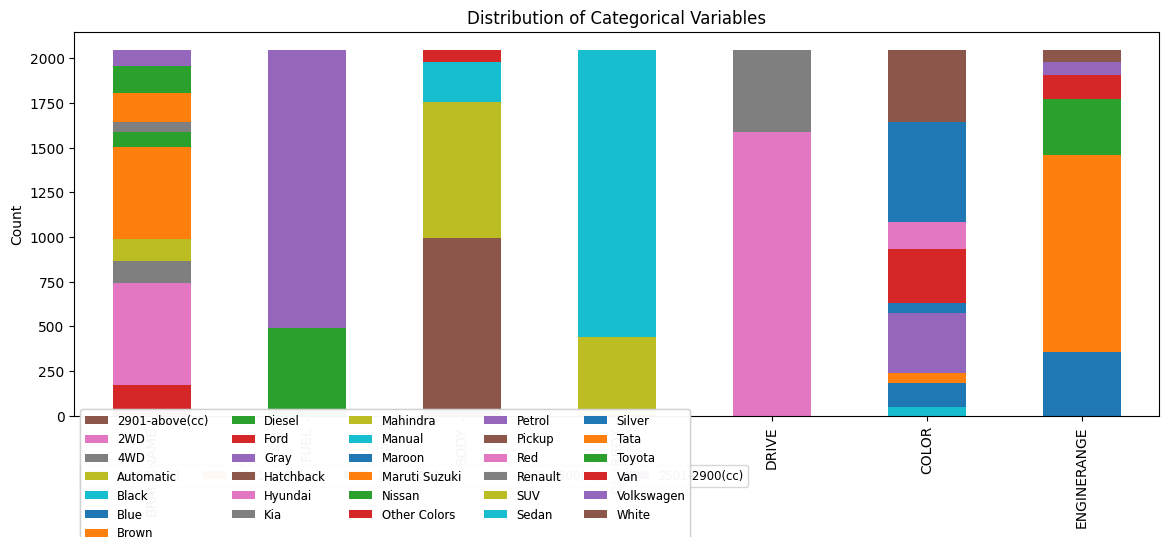

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming rw is your DataFrame containing the data
rw = pd.read_csv('Raw Data Final.csv',usecols=columns);

# Create a stacked bar chart
grouped_data = rw.apply(pd.Series.value_counts).T
fig, ax = plt.subplots(figsize=(14, 8))  # Increase the figsize for larger screen view
grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Count')
ax.set_title('Distribution of Categorical Variables')
plt.xticks(rotation=90)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Create multiple legends
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax.get_legend_handles_labels()

# Filter handles and labels for each legend
legend1 = ax.legend(handles1[:5], labels1[:5], bbox_to_anchor=(0, -0.2), loc='lower left', ncol=5,fontsize='small')
legend2 = ax.legend(handles2[5:], labels2[5:], bbox_to_anchor=(0, -0.35), loc='lower left', ncol=5,fontsize='small')

# Add legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

# Adjust layout to make room for legends below the plot
plt.subplots_adjust(bottom=0.4)

# Save the plot
plt.show()

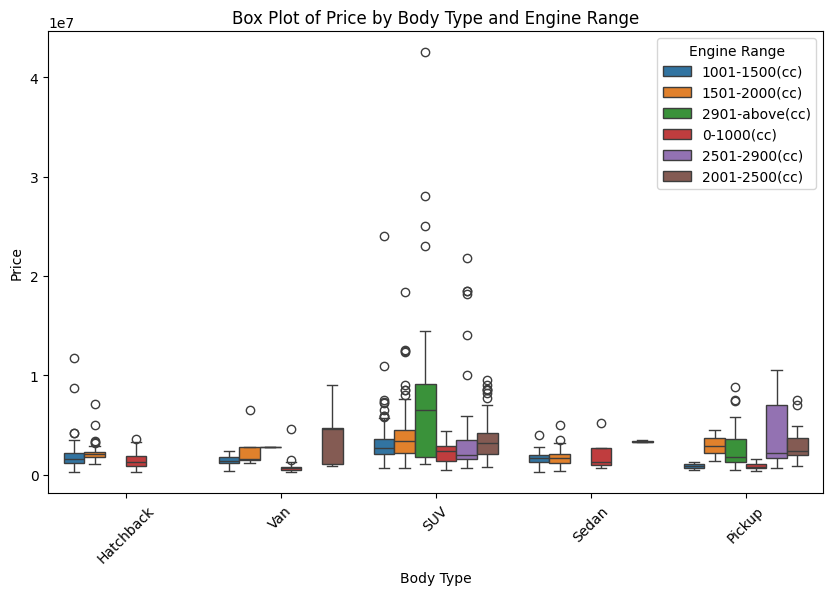

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Raw Data Final.csv');

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BODY', y='PRICE_NEW', hue='ENGINERANGE', data=df)
plt.title('Box Plot of Price by Body Type and Engine Range')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Engine Range')
plt.show()

/var/folders/fl/r69rsmbd5wd378_xcmctwj0c0000gn/T/ipykernel_37710/4198079787.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="PRICE_NEW",y="ENGINERANGE", data=df, palette="coolwarm")


<Axes: xlabel='PRICE_NEW', ylabel='ENGINERANGE'>

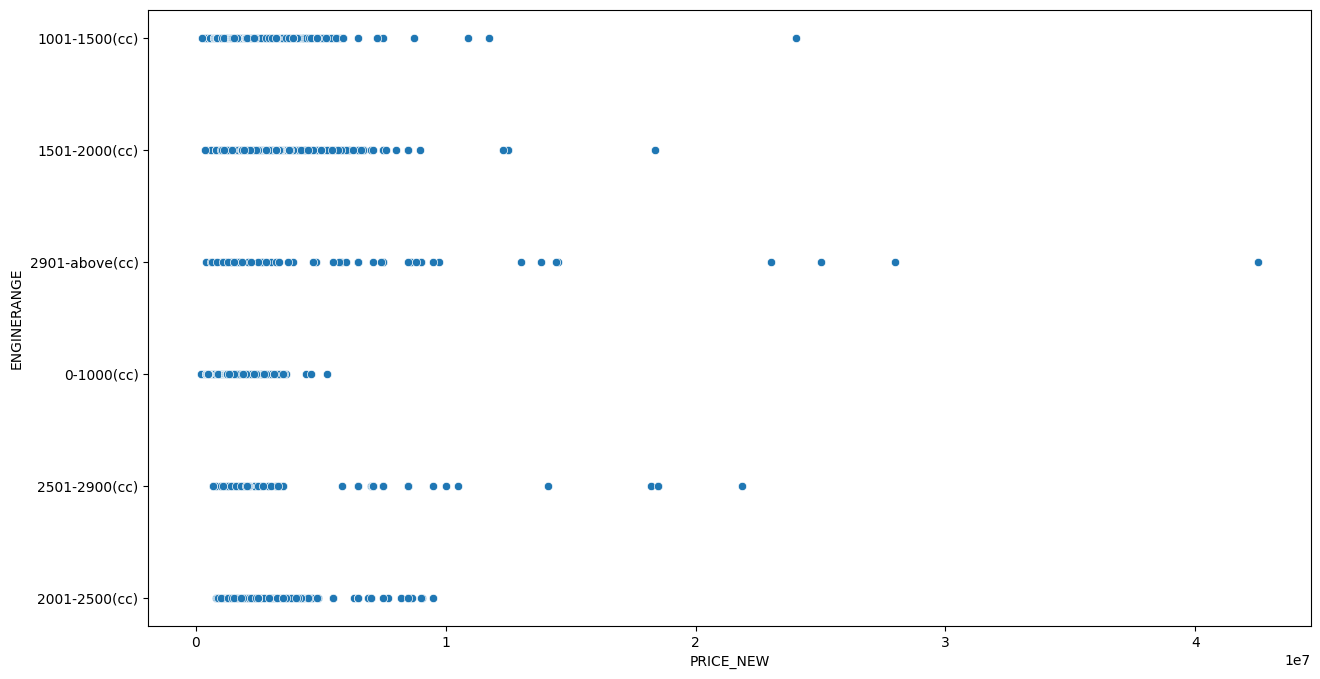

In [60]:
# # Plotting a scatterplot to see the view
plt.figure(figsize=(15,8))
sns.scatterplot(x="PRICE_NEW",y="ENGINERANGE", data=df, palette="coolwarm")

************Histogram Linear**************
************Histogram Log-Log**************


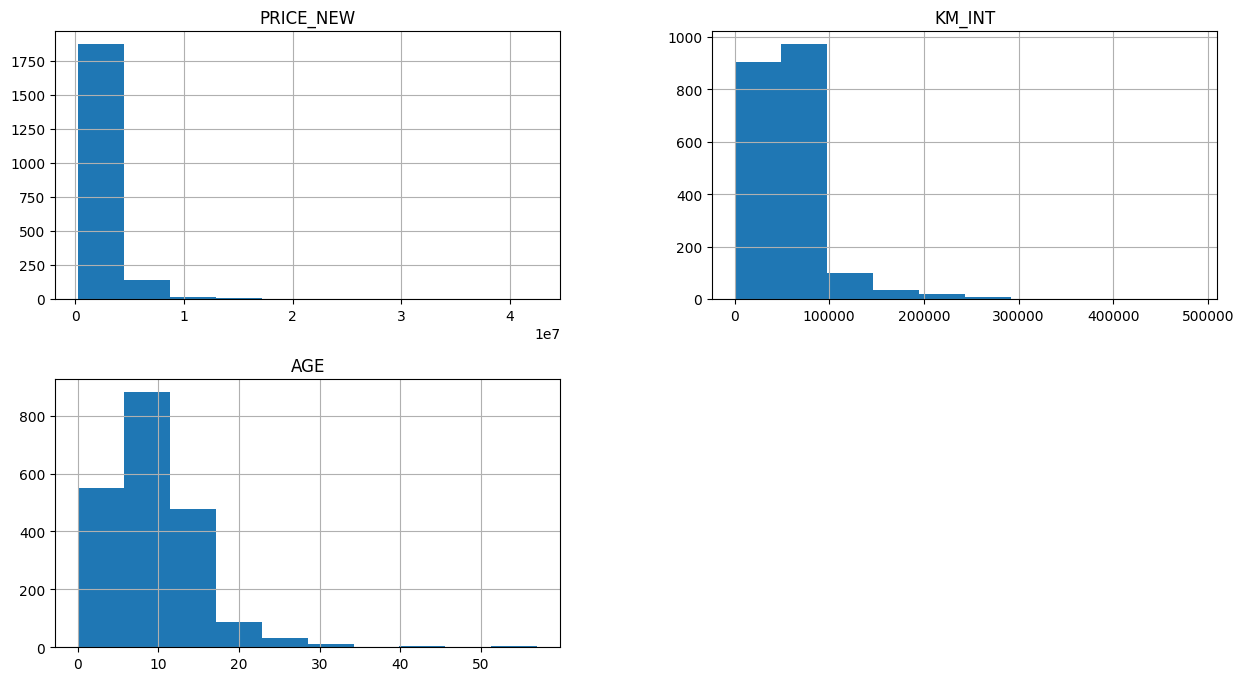

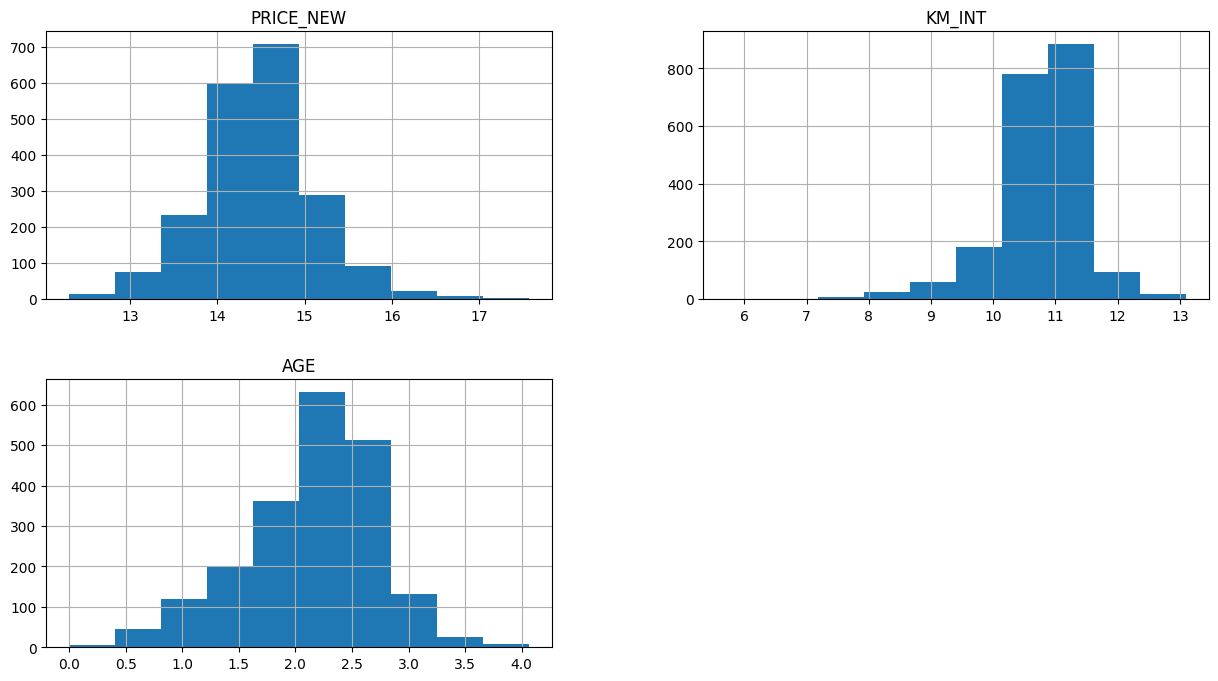

In [61]:
import numpy as np
columns = ["PRICE_NEW","KM_INT", "AGE"]

df = pd.read_csv('Raw Data Final.csv',usecols=columns);
# Since the above histogram does not look to be right or left squed and are not a bell shaped curve so we take logaarithm value
print('************Histogram Linear**************')
logDf =  df.loc[:, ['PRICE_NEW', 'KM_INT', 'AGE']]
logDf.hist(figsize=(15,8));

# logDf=df?.copy()
logDf['PRICE_NEW'] =np.log(logDf['PRICE_NEW']+1);
logDf['KM_INT'] =np.log(logDf['KM_INT']+1);
logDf['AGE'] =np.log(logDf['AGE']+1);
print('************Histogram Log-Log**************')

logDf.hist(figsize=(15,8));



           PRICE_NEW       AGE    KM_INT
PRICE_NEW   1.000000 -0.295722 -0.131095
AGE        -0.295722  1.000000  0.394016
KM_INT     -0.131095  0.394016  1.000000


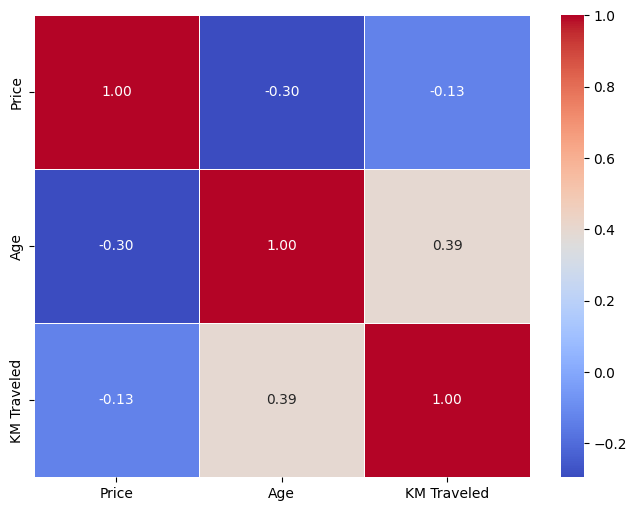

In [62]:
correlation_matrix = df[['PRICE_NEW', 'AGE', 'KM_INT']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
print(correlation_matrix)

heatmap=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_xticklabels(['Price', 'Age', 'KM Traveled'])
heatmap.set_yticklabels(['Price', 'Age', 'KM Traveled'])
# plt.title(' Correlation of Price, AGE, and KM(Speedometer Reading)')
plt.show()

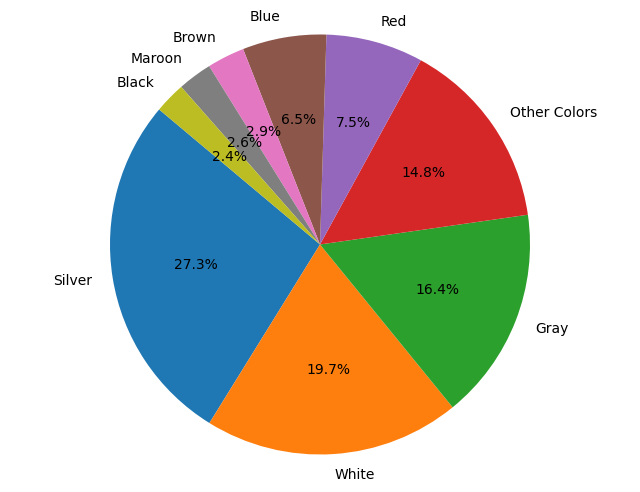

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
columns = ["COLOR","KM_INT", "AGE"]

df = pd.read_csv('Raw Data Final.csv',usecols=columns);
# Assuming 'df' is your DataFrame with a column named 'Color' containing color values

# Count the occurrences of each color
color_counts = df['COLOR'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Colors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()